D:\program\anaconda\envs\tf_gpu_1.13\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
D:\program\anaconda\envs\tf_gpu_1.13\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The TextWithDash class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Annotation instead.
D:\program\anaconda\envs\tf_gpu_1.13\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
D:\program\anaconda\envs\tf_gpu_1.13\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The TextWithDash class was deprecated in Matplotlib 3.1 and will be remove

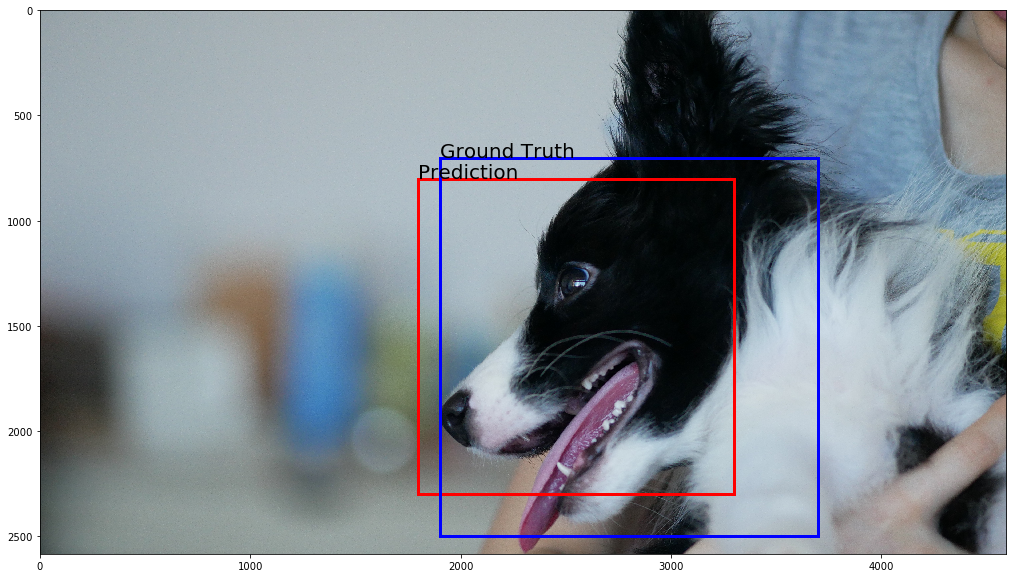

IOU值： 0.6220678532560706


'應該要得到0.6196482836879266'

In [3]:
import cv2
import matplotlib.patches as patches

import matplotlib.pyplot as plt

##讀入照片
image=cv2.imread('Dog.JPG')

##因為CV2會將照片讀成BGR，要轉回來
image=image[:,:,::-1]

Ground_Truth_BBOX=[1900,700,1800,1800]
Prediction_BBOX=[1800,800,1500,1500]

Ground_Truth_BBOX_Transform=[Ground_Truth_BBOX[0],Ground_Truth_BBOX[1],Ground_Truth_BBOX[0]+Ground_Truth_BBOX[2],Ground_Truth_BBOX[1]+Ground_Truth_BBOX[3]]
Prediction_BBOX_Transform=[Prediction_BBOX[0],Prediction_BBOX[1],Prediction_BBOX[0]+Prediction_BBOX[2],Prediction_BBOX[1]+Prediction_BBOX[3]]
plt.rcParams['figure.figsize'] = (20, 10)


fig,ax = plt.subplots(1)

##畫出圖片
ax.imshow(image)

# 畫BBOX-Prediction
rect = patches.Rectangle((Prediction_BBOX[0],Prediction_BBOX[1]),Prediction_BBOX[2],Prediction_BBOX[3],linewidth=3,edgecolor='r',facecolor='none',)
ax.text(1800,800,'Prediction',withdash=True,size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0],Ground_Truth_BBOX[1]),Ground_Truth_BBOX[2],Ground_Truth_BBOX[3],linewidth=3,edgecolor='b',facecolor='none')
ax.text(1900,700,'Ground Truth',withdash=True,size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)



plt.show()

def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0],boxB[0])
    yA = max(boxA[1],boxB[1])
    xB = min(boxA[2],boxB[2])
    yB = min(boxA[3],boxB[3])

    ## 計算交集區域
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    
    ## 計算各自的BBOX大小
    boxAArea = (boxA[0] - boxA[2] + 1) * (boxA[1] - boxA[3] + 1)
    boxBArea = (boxB[0] - boxB[2] + 1) * (boxB[1] - boxB[3] + 1)
    
    ## 計算IOU
    iou = interArea/(boxAArea+boxBArea-interArea)
    # return the intersection over union value
    return iou

IOU=bb_intersection_over_union(Ground_Truth_BBOX_Transform, Prediction_BBOX_Transform)
print('IOU值：',IOU) 
'''應該要得到0.6196482836879266'''